## Create example MNIST dataset

In [1]:
import torchvision

In [2]:
mnist_dataset = torchvision.datasets.MNIST("./datasets/MNIST", download=True, train=True)

  0%|          | 0/60000 [00:00<?, ?it/s]

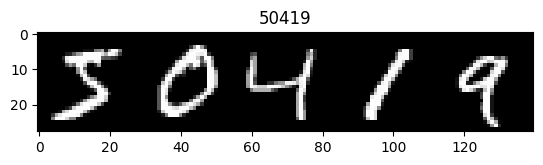

100%|██████████| 60000/60000 [00:03<00:00, 16263.92it/s]


In [3]:
import tqdm
import json
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

min_string_length = 4
max_string_length = 8
ann_jsonl_file = "./datasets/MNIST/ann_file.json"

with open(ann_jsonl_file, "w") as fd:
    fd.write("")

_text = ""
_images = []
show_first = True
idx = 0
for pillow_image, label in tqdm.tqdm(mnist_dataset, total=len(mnist_dataset)):
    _text += str(label)
    _images.append(np.array(pillow_image.convert("RGB")))
    if len(_text) >= np.random.randint(min_string_length, max_string_length):
        if show_first:
            plt.title(_text)
            plt.imshow(np.concatenate(_images, axis=1))
            plt.show()
            show_first = False
        
        Image.fromarray(np.concatenate(_images, axis=1)).save(os.path.join("./datasets/MNIST/", f"item_{idx}.jpg"))

        with open(ann_jsonl_file, "a") as fd:
            fd.write(json.dumps({
                "filename" : f"item_{idx}.jpg",
                "text" : str(_text),
            }))
            fd.write("\n")
        
        _text = ""
        _images = []
        idx += 1

In [4]:
import sys
sys.path.append("../")

from lightning_ocr.datasets import RecogTextDataset

dataset = RecogTextDataset(
    data_root="./datasets/MNIST/",
    ann_file="ann_file.json",
    pipeline=[],
)

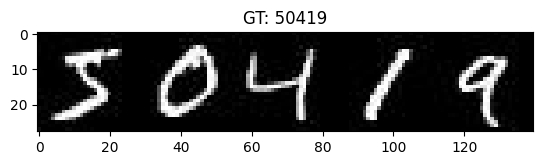

In [5]:
for item in dataset:
    RecogTextDataset.visualize_dataset(item, show=True)
    break